[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guiwitz/MLCV/blob/main/notebooks/03-Tensors.ipynb)

# Images as Tensors

In the first chapter, we have seen that images are simply treated as n-dimensional Numpy arrays in Python. In order to pass images through a Deep Learning (DL) network, we however need to make an adjustment: we have to convert the simple arrays into structures that can be easily "consumed" by a GPU, the key hardware that makes DL possible. Each main DL framework has its own such format, and mostly these structures are similar to regular Numpy arrays. In PyTorch this array variant is called a Tensor.

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio
torch.manual_seed(42);

## Convert an image

We have seen in the last chapter how to import an image:

In [2]:
image = iio.imread('https://upload.wikimedia.org/wikipedia/commons/1/1f/African_elephant_male.jpg')


Now we can easily convert this Numpy array into a PyTorch tensor with:

In [3]:
image_tensor = torch.from_numpy(image)

/var/folders/mk/632_7fgs4v374qc935pvf9v00000gn/T/ipykernel_90256/659736619.py:1: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525849783/work/torch/csrc/utils/tensor_numpy.cpp:205.)
  image_tensor = torch.from_numpy(image)


In [4]:
image_tensor.dtype

torch.uint8

In [5]:
image.dtype

dtype('uint8')

As can be seen above, when using ```from_numpy```, the type of the array is conserved. However the dtype is not *exactly* the same as PyTorch implements its own typing system. This typing system can sometimes be a bit confusing as different names are used. For example our current ```torch.uint8``` can also be called ```torch.ByteTensor```. For a complete reference see [this page](https://pytorch.org/docs/stable/tensors.html).

If we need to convert an array, we have two solutions. First, we can use attached methods such as ```long``` which converts the array to ```torch.int64``` (or ```torch.LongTensor```):

In [6]:
image_tensor_long = image_tensor.long()
image_tensor_long.dtype

torch.int64

Or we can use the method ```to``` and specify the desired type:

In [7]:
image_tensor_long2 = image_tensor.to(torch.long)
image_tensor_long2.dtype

torch.int64

Note that many of the features of Numpy arrays are conserved in tensors. For example, we can ask the shape of the array:

In [8]:
image_tensor_long.shape

torch.Size([735, 1083, 3])

or we can plot the tensors using Matplotlib:

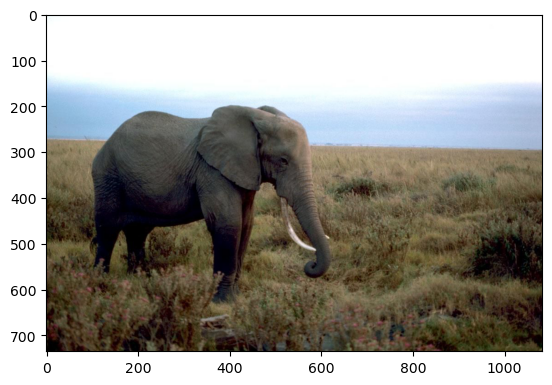

In [9]:
plt.imshow(image_tensor_long);

The reverse is also possible: we can transform a tensor back into an array:

In [10]:
image_numpy = image_tensor_long.numpy()

In [11]:
image_numpy.dtype

dtype('int64')

## Creating arrays

Alternatively, there are many ways to create new tensors in an almost identical ways to Numpy. For example we can create tensors filled with zeros or ones:

In [12]:
t_array = torch.ones((3,2))
t_array

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [13]:
t_array.dtype

torch.float32

Array type can be specified at creation:

In [14]:
t_array = torch.ones((3,2), dtype=torch.long)
t_array.dtype

torch.int64

Pytorch implements as well many other function to create arrays that are very similar to Numpy. For example random number arrays:

In [15]:
t_random = torch.randint(0,255,(10,10))

## Indexing, broadcasting etc.

The powerful logic behind Numpy that allows for a very efficient selection and combination of elements in arrays is also conserved in Pytorch. For example regular indexing:

In [16]:
t_random

tensor([[132, 167, 181, 199, 126, 125,  70, 164,  85,  38],
        [ 43, 124, 200,  39, 171,  37, 140,  10, 207, 106],
        [229, 176,  73, 206, 209, 208, 146, 189, 142,  79],
        [207, 150, 205, 184,  98, 229, 224, 176,   7,  90],
        [221,  12,  97,  69, 237,   8, 218, 199, 243,   2],
        [195,  54,  85, 189,  61, 169, 250, 179, 158, 243],
        [101,   0,  95, 250, 150, 206, 138, 160,  16, 121],
        [212, 174, 124, 208,  88, 179,  18,  37,  98, 176],
        [  9,  46,  41, 108,  52,  80, 184,  93, 140,  13],
        [187,   2, 105,  69,  91,  80,  31, 184,  86,  14]])

In [17]:
t_random[0,:]

tensor([132, 167, 181, 199, 126, 125,  70, 164,  85,  38])

or broadcasting that allows to combine tensors of different but compatible shapes:

In [18]:
torch.ones((3,5)) * torch.randint(0,255, (1,5))

tensor([[160.,   3.,  42., 215.,  22.],
        [160.,   3.,  42., 215.,  22.],
        [160.,   3.,  42., 215.,  22.]])

We will see that very often we also need to flatten arrays for example to create a fully connected layer in a deep learning network. This can be done in two ways. You can use the ```flatten``` function/method:

In [19]:
t_random.flatten()

tensor([132, 167, 181, 199, 126, 125,  70, 164,  85,  38,  43, 124, 200,  39,
        171,  37, 140,  10, 207, 106, 229, 176,  73, 206, 209, 208, 146, 189,
        142,  79, 207, 150, 205, 184,  98, 229, 224, 176,   7,  90, 221,  12,
         97,  69, 237,   8, 218, 199, 243,   2, 195,  54,  85, 189,  61, 169,
        250, 179, 158, 243, 101,   0,  95, 250, 150, 206, 138, 160,  16, 121,
        212, 174, 124, 208,  88, 179,  18,  37,  98, 176,   9,  46,  41, 108,
         52,  80, 184,  93, 140,  13, 187,   2, 105,  69,  91,  80,  31, 184,
         86,  14])

Here you can also specify which *contiguous* dimensions you want to flatten e.g.:

In [20]:
t_3d = torch.randint(0,100,(2,3,4))
t_3d

tensor([[[21,  5,  7, 45],
         [38, 95, 34, 91],
         [21, 90, 39, 20]],

        [[29, 11, 68, 39],
         [36, 17, 46,  0],
         [79, 65, 92, 39]]])

In [21]:
torch.flatten(t_3d, start_dim=1, end_dim=2)

tensor([[21,  5,  7, 45, 38, 95, 34, 91, 21, 90, 39, 20],
        [29, 11, 68, 39, 36, 17, 46,  0, 79, 65, 92, 39]])

The alternative is to use the ```view``` method, which, if possible, returns only a ```view``` of the array. You can pass compatible dimensions to reshape the tensor, or simple use ```-1``` to completely flatten it. 

In [22]:
t_random = torch.randint(0,255,(10,10))

In [23]:
t_random.view(5, 20)

tensor([[ 86,  22, 188, 251,  85,   1, 148,  41,  28, 135, 226, 164, 240,   5,
         254,  40, 152,  50,  98, 148],
        [217,  52, 167,  81, 103, 162,   7, 111,  73, 135,  13, 176,  95, 238,
         192, 103, 113, 224,  53,  12],
        [ 80, 160,  44,  93, 236,  57, 154,  62,   6,  48, 202, 218, 137,  81,
          25,  85, 196, 245,  30,  61],
        [ 14, 177,  89, 177, 115,  67,  48, 143, 191,  76, 104,  16,  89,  64,
         248, 159, 147, 195, 154,  99],
        [236,  69,  85,  63,  82, 164,  30, 116,  55,  92, 110,  88, 238, 144,
         186, 218, 201, 214, 221,  65]])

In [24]:
t_random.view(-1)

tensor([ 86,  22, 188, 251,  85,   1, 148,  41,  28, 135, 226, 164, 240,   5,
        254,  40, 152,  50,  98, 148, 217,  52, 167,  81, 103, 162,   7, 111,
         73, 135,  13, 176,  95, 238, 192, 103, 113, 224,  53,  12,  80, 160,
         44,  93, 236,  57, 154,  62,   6,  48, 202, 218, 137,  81,  25,  85,
        196, 245,  30,  61,  14, 177,  89, 177, 115,  67,  48, 143, 191,  76,
        104,  16,  89,  64, 248, 159, 147, 195, 154,  99, 236,  69,  85,  63,
         82, 164,  30, 116,  55,  92, 110,  88, 238, 144, 186, 218, 201, 214,
        221,  65])

Since we are dealing with a ```view```, if we modify one of the arrays *in place*, the values in the other arrays are changed as well. This means that this is **not** and independent array but just a shallow-copy. Therefore be *careful*.

In [25]:
view_copy = t_random.view(5,20)
view_copy

tensor([[ 86,  22, 188, 251,  85,   1, 148,  41,  28, 135, 226, 164, 240,   5,
         254,  40, 152,  50,  98, 148],
        [217,  52, 167,  81, 103, 162,   7, 111,  73, 135,  13, 176,  95, 238,
         192, 103, 113, 224,  53,  12],
        [ 80, 160,  44,  93, 236,  57, 154,  62,   6,  48, 202, 218, 137,  81,
          25,  85, 196, 245,  30,  61],
        [ 14, 177,  89, 177, 115,  67,  48, 143, 191,  76, 104,  16,  89,  64,
         248, 159, 147, 195, 154,  99],
        [236,  69,  85,  63,  82, 164,  30, 116,  55,  92, 110,  88, 238, 144,
         186, 218, 201, 214, 221,  65]])

In [26]:
view_copy.fill_(1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [27]:
t_random

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

## Tensor image processing

We have seen in the previous chapter that we could do operations on image such as rotations, filtering etc. Those operations can typically be useful *during* training to perform data augmentation, i.e. increase the variety of the training sample. To achieve this, we can operate directly on tensors via the ```transform``` submodule of PyTorch. Before we do anything we can also use a transform to convert a Numpy array to a tensor:

In [28]:
import torchvision

In [29]:
image = iio.imread('https://upload.wikimedia.org/wikipedia/commons/1/1f/African_elephant_male.jpg')

image_tensor = torchvision.transforms.functional.to_tensor(image)

In [30]:
image_tensor.shape

torch.Size([3, 735, 1083])

Note that this conversion changes the order of axis to put channels in first position!

Now we can apply a rotation:

In [31]:
im_rot = torchvision.transforms.functional.rotate(image_tensor, 30)

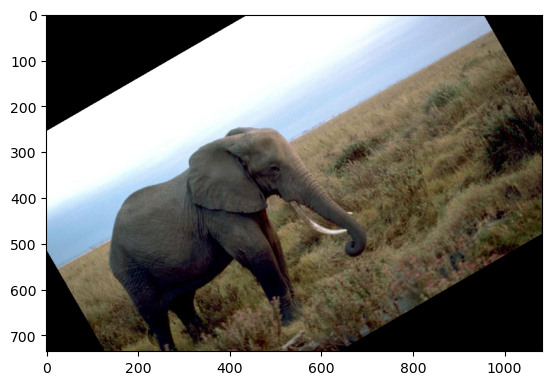

In [32]:
plt.imshow(torch.moveaxis(im_rot, 0,2));

When we create an augmentation pipeline, we usually combine multiple image operations and perform them in a random way. We can easily achieve this by composing multiple operations. For example here we:
- convert the image to a tensor
- resize it to a size of 50x50 pixels
- apply a random rotation

In [34]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((50,50)),
    torchvision.transforms.RandomRotation(20)
])

In [36]:
im_augment = transforms(image)

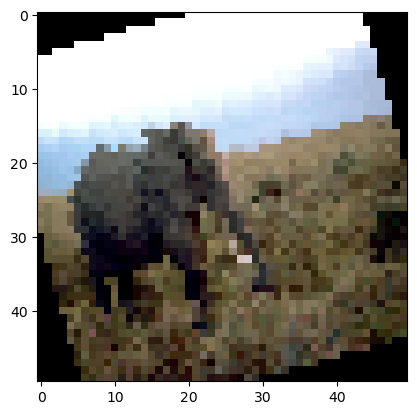

In [38]:
plt.imshow(torch.moveaxis(im_augment, 0,2));

## Gradients

To be able to perform backpropagation in Deep Learning networks, we need to be able to calculate all the necessary gradients. This feature is "integrated" into Pytorch arrays directly if we use the ```requires_grad``` option. To start with a simple example, let's define first a variable $x=1$:

In [28]:
x = torch.ones(1, 1, requires_grad=True)

In [29]:
x

tensor([[1.]], requires_grad=True)

Now we let our variable pass through a few simple operations:

In [30]:
y = 2 * x

In [31]:
z = y**(3/2)

In [32]:
w = 5 * z

Our last variable that depends initially on ```x``` is now ```w```. We see that $w = f(z) = f(g(y)) = f(g(h(x))) = k(x)$ with:

$f(z) = 5*z$

$g(y) = y^{3/2}$

$h(x) = 2*x$

If ```w``` needs to be optimized with respect to the variablex x, following th chain rule, we need to calculate $k'(x) = f'(g(h(x))*g'(h(x))*h'(x)$

$5 * \frac{3}{2}(2x)^{0.5} * 2$


This complete calculation can simply be performed by calcualting the gradients of w $dw/dx$:

In [33]:
w.backward()

In [34]:
print(x.grad)

tensor([[21.2132]])


We can verify that we indeed obtain the correct gradient:

In [35]:
5 * (3/2)*(2**0.5) * 2


21.213203435596427

Of course this is an over-simplified example. Calculations become more complex when dealing with actual vectors or tensors but the principle remains the same.

Finally note that if you want to recover a Numpy array from a PyTorch tensor, or plot a PyTorch tensor with Matplotlib, you first have to *detach* it from the gradient calculation system (if necessary) to recover it:

In [36]:
x.numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [37]:
x.detach().numpy()

array([[1.]], dtype=float32)

## Sending tensors to a GPU

If your computer is equipped with a compatible GPU or if you run the notebook on Google Colab with a GPU runtime, you can exploit Graphics card computing power. For that the data have to be "pushed" and "pulled" to and from that device. We will see later that we can push entire networks thre but for the moment we just send a tensor.

First we have to check wheter a GPU is available:

In [32]:
torch.cuda.is_available()

True

If yes we can device a GPU device (a CUDA device in fact):

In [37]:
dev = torch.device("cuda")
dev

device(type='cuda')

Finally we can send the data the the "CUDA" device:

In [40]:
mytensor = torch.randn((3,5))
mytensor = mytensor.to(dev)
mytensor

tensor([[ 0.1078, -1.2955,  0.9824, -2.2888, -0.9240],
        [ 1.1793, -1.8081, -1.4458, -1.2130,  0.9562],
        [-0.5964,  1.9136, -1.2986, -0.1035,  1.0607]], device='cuda:0')

In [41]:
mytensor.numpy()

TypeError: ignored

We see here that we have again difficulties getting the tensor "out" of PyTorch. This time not because it's part of a gradient but because it lives on the GPU. So we need to first copy it back to the CPU first:

In [42]:
mytensor_CPU = mytensor.cpu()

In [43]:
mytensor_CPU.numpy()

array([[ 0.10778594, -1.2954801 ,  0.98242337, -2.2888114 , -0.9239933 ],
       [ 1.1793374 , -1.8080784 , -1.4457537 , -1.2130216 ,  0.9561631 ],
       [-0.59640384,  1.9136024 , -1.2985845 , -0.10350052,  1.0606741 ]],
      dtype=float32)

You will regularly hit this kind of problems when writing your code, so remember these two potential issues when you want to *post-process* some tensor:
- you migth need to *detach* it from the gradient calculation
- you migth need to pull it out of the GPU
- for NN computation, you might need to push your data (tensors) to the GPU

## Exercises

1. Create a tensor of integers in the range 0-100 of size 16x16
2. Change its "gradient-status" by attaching it to gradient calculation
3. Solve the problem appearing in (2.) by creating a float32 tensor and attaching the gradient again
4. Flatten the array to 1d
5. Transform your flat tensor to a numpy array